# Real-or-Fake News

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn. model_selection import KFold
import itertools
import string
import nltk
nltk.download('stopwords')
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import squarify
from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iamva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('fake_or_real_news.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

<AxesSubplot:>

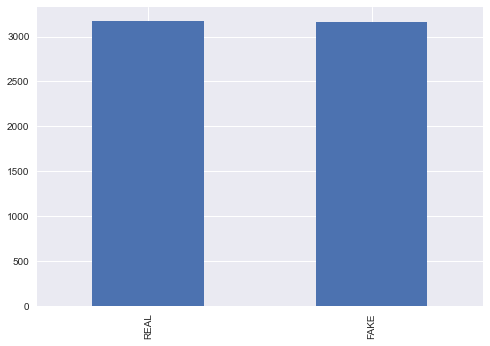

In [5]:
df['label'].value_counts().plot(kind='bar')

In [6]:
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [8]:
X = df['text']
y = df['label']
X.head(), y.head()

(0    Daniel Greenfield, a Shillman Journalism Fello...
 1    Google Pinterest Digg Linkedin Reddit Stumbleu...
 2    U.S. Secretary of State John F. Kerry said Mon...
 3    — Kaydee King (@KaydeeKing) November 9, 2016 T...
 4    It's primary day in New York and front-runners...
 Name: text, dtype: object,
 0    FAKE
 1    FAKE
 2    REAL
 3    FAKE
 4    REAL
 Name: label, dtype: object)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 42)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5068,), (1267,), (5068,), (1267,))

In [11]:
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer

CountVectorizer(stop_words='english')

In [12]:
count_train = count_vectorizer.fit_transform(X_train)
count_train.shape

(5068, 61595)

In [13]:
print(count_vectorizer.vocabulary_)

{'president': 42713, 'obama': 38403, 'offered': 38675, 'enthusiastic': 18933, 'support': 53108, 'hillary': 25891, 'clinton': 11337, 'democratic': 15200, 'national': 37098, 'convention': 12864, 'wednesday': 59379, 'painted': 39874, 'hopeful': 26377, 'picture': 41335, 'country': 13320, 'barack': 6112, 'presidential': 42715, 'candidate': 9458, 'wave': 59243, 'crowd': 13780, 'spoke': 51474, 'philadelphia': 41181, 'penn': 40745, 'july': 29960, '27': 891, '2016': 703, 'described': 15538, 'optimistic': 39060, 'america': 3662, 'speech': 51318, 'night': 37691, 'pointedly': 41904, 'diverging': 16740, 'foreboding': 21755, 'tone': 55212, 'previous': 42802, 'week': 59389, 'republican': 45919, 'event': 19525, 'mr': 36454, 'endorsement': 18718, 'saying': 48078, 'qualified': 43885, 'galvanized': 22682, 'delegates': 15064, 'drawing': 17296, 'sharp': 49328, 'contrast': 12816, 'dark': 14406, 'portrait': 42208, 'nominee': 37890, 'donald': 16999, 'trump': 56057, 'future': 22533, 'said': 47621, 'cheered': 1

#### Transform the test set

In [14]:
count_test = count_vectorizer.transform(X_test)

In [15]:
# max_df removes those words which appear more in than 70% of the articles

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [16]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_train.shape

(5068, 61595)

In [17]:
# print the first 10 rows
tfidf_train.A[:10]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05444238, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.04846548, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [18]:
count_train.A[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Transform the test set

In [19]:
tfidf_test = tfidf_vectorizer.transform(X_test)

### Creating Pipeline

#### TF-IDF

In [20]:
nb_pipeline = Pipeline([
    ('NBTV', tfidf_vectorizer),
    ('nb_clf', MultinomialNB())
])

In [21]:
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('NBTV', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('nb_clf', MultinomialNB())])

In [22]:
predict_nbt = nb_pipeline.predict(X_test)
predict_nbt

array(['REAL', 'FAKE', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype='<U4')

In [23]:
score = accuracy_score(y_test, predict_nbt)
print("Accuracy: {}".format(round(score*100,2)))

Accuracy: 84.14


In [24]:
print(classification_report(y_test, predict_nbt))

              precision    recall  f1-score   support

        FAKE       0.98      0.70      0.81       633
        REAL       0.77      0.98      0.86       634

    accuracy                           0.84      1267
   macro avg       0.87      0.84      0.84      1267
weighted avg       0.87      0.84      0.84      1267



In [25]:
confusion_matrix = confusion_matrix(y_test, predict_nbt)
confusion_matrix

array([[442, 191],
       [ 10, 624]], dtype=int64)

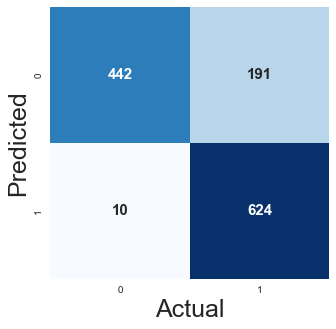

In [26]:
fig, ax = plt.subplots(figsize=(5,5))
ax=sns.heatmap(data=confusion_matrix, annot=True,fmt='d', annot_kws={'size': 15,"weight":"bold"},cbar=False, cmap='Blues')
ax.set_ylabel("Predicted", fontsize = 25)
ax.set_xlabel("Actual", fontsize = 25);


#### CountVectorizer

In [27]:
nbc_pipeline = Pipeline([
    ('NBCV',count_vectorizer),
    ('nb_clf', MultinomialNB())
])

In [28]:
nbc_pipeline.fit(X_train,y_train)

Pipeline(steps=[('NBCV', CountVectorizer(stop_words='english')),
                ('nb_clf', MultinomialNB())])

In [29]:
predict_nbc = nbc_pipeline.predict(X_test)
score = accuracy_score(y_test, predict_nbc)
print("Accuracy: {}".format(round(score*100,2)))

Accuracy: 88.4


In [30]:
print(classification_report(y_test, predict_nbc))

              precision    recall  f1-score   support

        FAKE       0.92      0.84      0.88       633
        REAL       0.86      0.92      0.89       634

    accuracy                           0.88      1267
   macro avg       0.89      0.88      0.88      1267
weighted avg       0.89      0.88      0.88      1267



In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix = confusion_matrix(y_test, predict_nbc)

In [33]:
confusion_matrix

array([[534,  99],
       [ 48, 586]], dtype=int64)

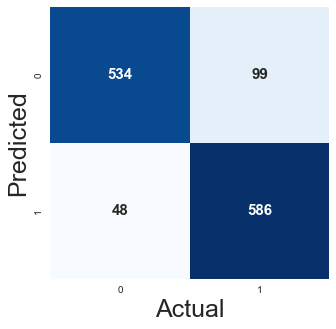

In [34]:
fig, ax = plt.subplots(figsize=(5,5))
ax=sns.heatmap(data=confusion_matrix, annot=True,fmt='d', annot_kws={'size': 15,"weight":"bold"},cbar=False, cmap='Blues')
ax.set_ylabel("Predicted", fontsize = 25)
ax.set_xlabel("Actual", fontsize = 25);


#### Passive Aggressive Classifier

In [35]:
linear_clf = Pipeline([
    ('linear', tfidf_vectorizer),
    ('pa_clf', PassiveAggressiveClassifier(max_iter=50))
])

In [36]:
linear_clf.fit(X_train, y_train)

Pipeline(steps=[('linear', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('pa_clf', PassiveAggressiveClassifier(max_iter=50))])

In [37]:
predict_pac = linear_clf.predict(X_test)

In [38]:
score = accuracy_score(y_test, predict_pac)
print("Accuracy: {}".format(round(score*100,2)))

Accuracy: 94.32


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict_pac)
confusion_matrix

array([[602,  31],
       [ 41, 593]], dtype=int64)

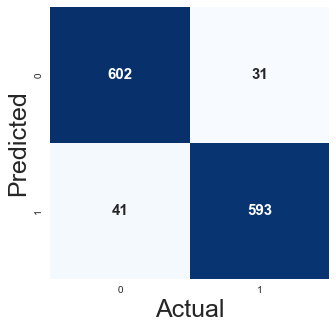

In [40]:
fig, ax = plt.subplots(figsize=(5,5))
ax=sns.heatmap(data=confusion_matrix, annot=True,fmt='d', annot_kws={'size': 15,"weight":"bold"},cbar=False, cmap='Blues')
ax.set_ylabel("Predicted", fontsize = 25)
ax.set_xlabel("Actual", fontsize = 25);

In [41]:
print(classification_report(y_test, predict_pac))

              precision    recall  f1-score   support

        FAKE       0.94      0.95      0.94       633
        REAL       0.95      0.94      0.94       634

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



# Another Approach

In [42]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [43]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [44]:
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [45]:
df['title_len'] = df['title'].apply(len)
df['text_len'] = df['text'].apply(len)

In [46]:
df.head()

,title,text,label,title_len,text_len
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,7518
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,2646
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,43,2543
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84,2660
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,48,1840


### Difference in _'text_len'_ and _'title_len'_ between **FAKE** and **REAL** 

<AxesSubplot:ylabel='Frequency'>

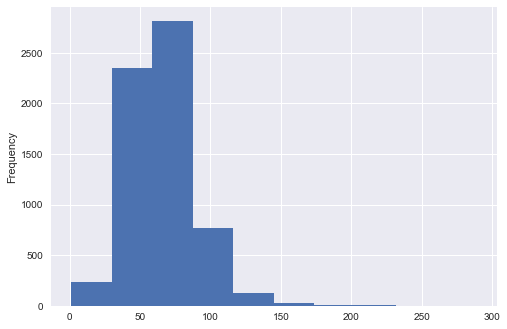

In [47]:
df['title_len'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

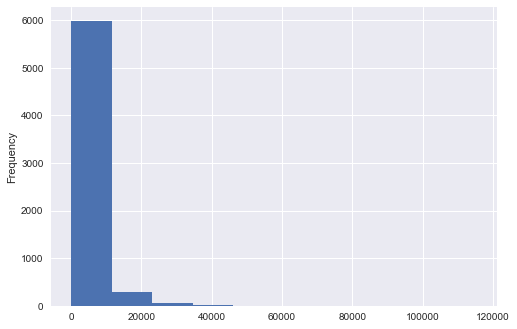

In [48]:
df['text_len'].plot(kind='hist')

<AxesSubplot:xlabel='label'>

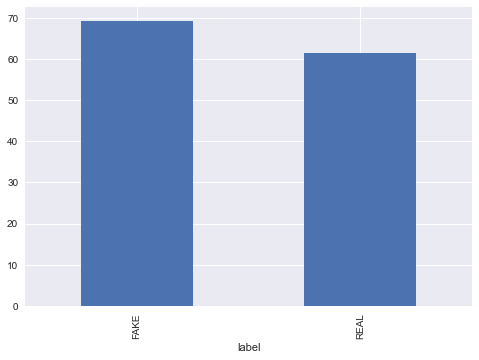

In [49]:
df.groupby('label')['title_len'].mean().plot(kind='bar')

<AxesSubplot:xlabel='title_len', ylabel='Count'>

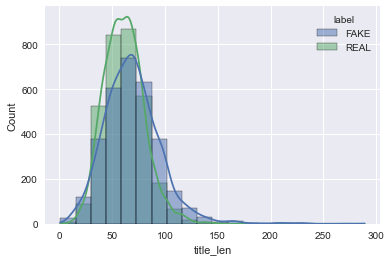

In [50]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(x='title_len', hue='label', data=df, kde=True, bins=20)

<AxesSubplot:xlabel='label', ylabel='title_len'>

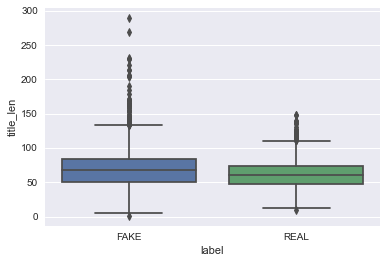

In [51]:
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x='label', y='title_len', data=df)

### Kind of words in the title we should be careful against FAKE NEWS

In [52]:
df_fake_title = df[df['label']=='FAKE']
df_fake_title

,title,text,label,title_len,text_len
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,7518
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,2646
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84,2660
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,11,13333
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,73,3171
...,...,...,...,...,...
6326,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE,83,3077
6328,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE,73,1
6329,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE,64,2572
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,59,14323


In [53]:
list_stopwords = set(stopwords.words('english'))

In [54]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iamva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
df_fake_title['title'] = df_fake_title['title'].str.lower()
df_fake_title['title'] = df_fake_title['title'].apply(word_tokenize)
df_fake_title['title'] = df_fake_title['title'].apply(lambda x: [word for word in x if word not in list_stopwords])
df_fake_title['title'] = df_fake_title['title'].apply(lambda x: [word.translate(str.maketrans('', '', string.punctuation)) for word in x])
df_fake_title['title'] = df_fake_title['title'].apply(lambda x: [word for word in x if len(word) > 1])
df_fake_title = pd.DataFrame(df_fake_title['title'])
df_fake_title.head()

,title
0,"[smell, hillary, fear]"
1,"[watch, exact, moment, paul, ryan, committed, ..."
3,"[bernie, supporters, twitter, erupt, anger, dn..."
5,"[tehran, usa]"
6,"[girl, horrified, watches, boyfriend, left, fa..."


In [56]:
df_fake_title

,title
0,"[smell, hillary, fear]"
1,"[watch, exact, moment, paul, ryan, committed, ..."
3,"[bernie, supporters, twitter, erupt, anger, dn..."
5,"[tehran, usa]"
6,"[girl, horrified, watches, boyfriend, left, fa..."
...,...
6326,"[doj, complaint, comey, fire, partisan, witch,..."
6328,"[radio, derb, air–leonardo, brazil, miss, bum,..."
6329,"[assange, claims, crazed, clinton, campaign, t..."
6331,"[pbs, stand, plutocratic, pentagon]"


In [57]:
df_fake_title1 = pd.DataFrame(df_fake_title['title'].explode())

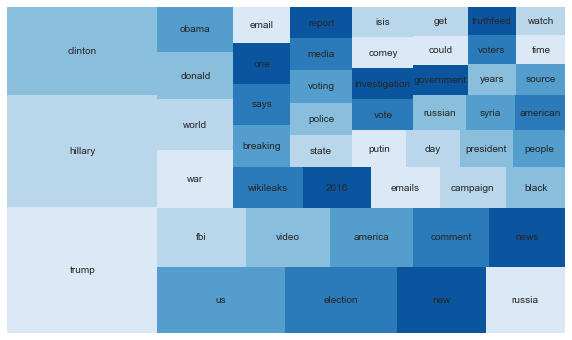

<Figure size 720x288 with 0 Axes>

In [58]:
df_fake_title1 = pd.DataFrame(df_fake_title1.groupby('title')['title'].count().sort_values(ascending=False).head(50))
df_fake_title1=df_fake_title1.rename(columns={'title':'num'})

plt.figure(figsize=(10,6))
x = df_fake_title1['num']
label = df_fake_title1.index
squarify.plot(x, label=label,color=sns.color_palette("Blues"))
plt.axis('off')
plt.figure(figsize=(10,4))
plt.show()

### Classify 'FAKE' by 'title' with machine learning

In [59]:
def pre_process(text):
    
    text = text.translate(str.maketrans('','', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    words = ""
    for i in text:
        stemmer = SnowballStemmer('english')
        words += (stemmer.stem(i))+' '
    return words

In [60]:
textFeatures = df['title'].copy()
textFeatures = textFeatures.apply(pre_process)
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(textFeatures)

X_train, X_test, y_train, y_test = train_test_split(features, df['label'], test_size=0.2, random_state=42)

## Support Vector Classifier

In [61]:
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train, y_train)
prediction = svc.predict(X_test)

In [62]:
score = accuracy_score(y_test, prediction)
print("Accuracy: {}".format(round(score*100,2)))

Accuracy: 81.14


[[521 107]
 [132 507]]


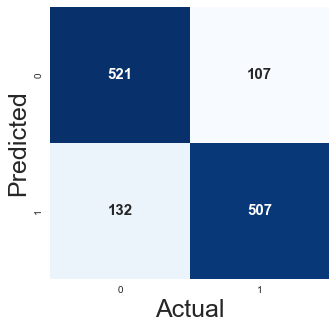

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

fig, ax = plt.subplots(figsize=(5,5))
ax=sns.heatmap(data=confusion_matrix, annot=True,fmt='d', annot_kws={'size': 15,"weight":"bold"},cbar=False, cmap='Blues')
ax.set_ylabel("Predicted", fontsize = 25)
ax.set_xlabel("Actual", fontsize = 25);

In [64]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        FAKE       0.80      0.83      0.81       628
        REAL       0.83      0.79      0.81       639

    accuracy                           0.81      1267
   macro avg       0.81      0.81      0.81      1267
weighted avg       0.81      0.81      0.81      1267



## Naive Bayes

In [65]:
mnb = MultinomialNB(alpha=0.2)
mnb.fit(X_train, y_train)
prediction = mnb.predict(X_test)

In [66]:
score = accuracy_score(y_test, prediction)
print("Accuracy: {}".format(round(score*100,2)))

Accuracy: 80.9


[[483 145]
 [ 97 542]]


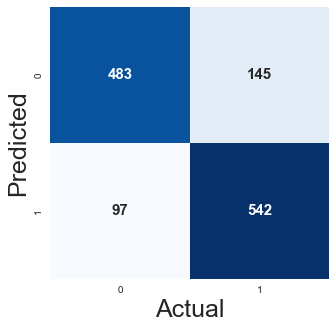

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

fig, ax = plt.subplots(figsize=(5,5))
ax=sns.heatmap(data=confusion_matrix, annot=True,fmt='d', annot_kws={'size': 15,"weight":"bold"},cbar=False, cmap='Blues')
ax.set_ylabel("Predicted", fontsize = 25)
ax.set_xlabel("Actual", fontsize = 25);

In [68]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        FAKE       0.83      0.77      0.80       628
        REAL       0.79      0.85      0.82       639

    accuracy                           0.81      1267
   macro avg       0.81      0.81      0.81      1267
weighted avg       0.81      0.81      0.81      1267



#### We can classify FAKE News by _**title**_ with 80% accuracy

## Let's try with _text_length_

<AxesSubplot:xlabel='label'>

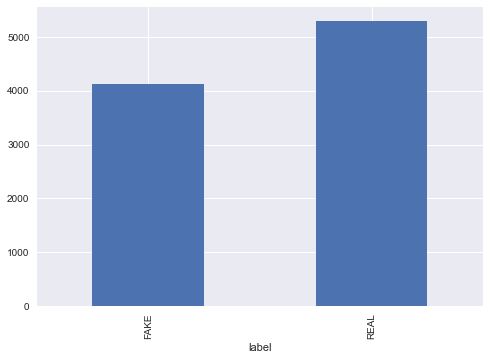

In [69]:
df.groupby('label')['text_len'].mean().plot(kind='bar')

<AxesSubplot:xlabel='text_len', ylabel='Count'>

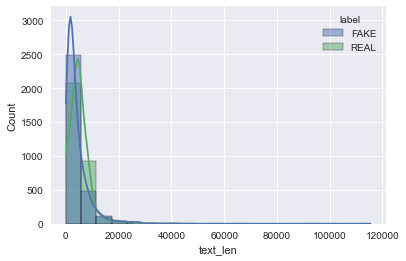

In [70]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(x='text_len', hue='label', data=df, kde=True, bins=20)

<AxesSubplot:xlabel='label', ylabel='text_len'>

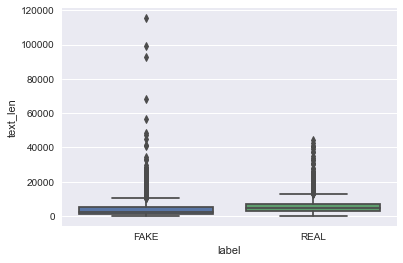

In [71]:
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x='label', y='text_len', data=df)

##### As compared with REAL News, FAKE news has longer text

##### Words to look out in FAKE news

In [72]:
df_fake_text = df[df['label']=='FAKE']
df_fake_text.head()

,title,text,label,title_len,text_len
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,7518
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,2646
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84,2660
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,11,13333
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,73,3171


In [73]:
df_fake_text['text'] = df_fake_text['text'].str.lower()
df_fake_text['text'] = df_fake_text['text'].apply(word_tokenize)
df_fake_text['text'] = df_fake_text['text'].apply(lambda x: [word for word in x if word not in list_stopwords])
df_fake_text['text'] = df_fake_text['text'].apply(lambda x: [word.translate(str.maketrans('', '', string.punctuation)) for word in x])
df_fake_text['text'] = df_fake_text['text'].apply(lambda x: [word for word in x if len(word) > 1])
df_fake_text = pd.DataFrame(df_fake_text['text'])
df_fake_text.head()

,text
0,"[daniel, greenfield, shillman, journalism, fel..."
1,"[google, pinterest, digg, linkedin, reddit, st..."
3,"[kaydee, king, kaydeeking, november, 2016, les..."
5,"[immigrant, grandparents, 50, years, ago, arri..."
6,"[share, baylee, luciani, left, screenshot, bay..."


In [74]:
df_fake_text1 = pd.DataFrame(df_fake_text['text'].explode())

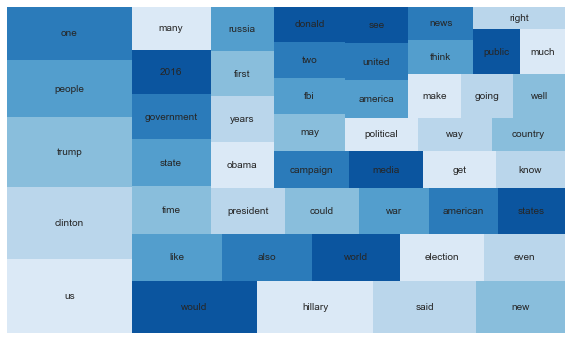

<Figure size 720x288 with 0 Axes>

In [75]:
df_fake_text1 = pd.DataFrame(df_fake_text1.groupby('text')['text'].count().sort_values(ascending=False).head(50))
df_fake_text1=df_fake_text1.rename(columns={'text':'num'})

plt.figure(figsize=(10,6))
x = df_fake_text1['num']
label = df_fake_text1.index
squarify.plot(x, label=label,color=sns.color_palette("Blues"))
plt.axis('off')
plt.figure(figsize=(10,4))
plt.show()

#### Classifying 'FAKE' news by machine Learning

In [76]:
textFeatures2 = df['text'].copy()
textFeatures2 = textFeatures2.apply(pre_process)
vectorizer = TfidfVectorizer()
features2 = vectorizer.fit_transform(textFeatures2)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(features2, df['label'], test_size=0.2, random_state=42)

In [78]:
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train, y_train)
prediction = svc.predict(X_test)

In [79]:
score = accuracy_score(y_test, prediction)
print("Accuracy: {}".format(round(score*100,2)))

Accuracy: 93.53


[[594  34]
 [ 48 591]]


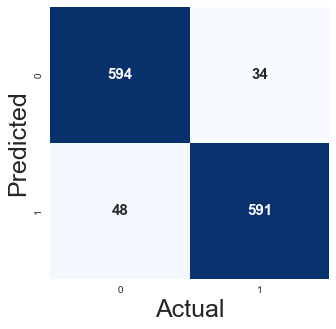

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

fig, ax = plt.subplots(figsize=(5,5))
ax=sns.heatmap(data=confusion_matrix, annot=True,fmt='d', annot_kws={'size': 15,"weight":"bold"},cbar=False, cmap='Blues')
ax.set_ylabel("Predicted", fontsize = 25)
ax.set_xlabel("Actual", fontsize = 25);

In [81]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        FAKE       0.93      0.95      0.94       628
        REAL       0.95      0.92      0.94       639

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



In [82]:
mnb = MultinomialNB(alpha=0.2)
mnb.fit(X_train, y_train)
prediction = mnb.predict(X_test)

In [83]:
score = accuracy_score(y_test, prediction)
print("Accuracy: {}".format(round(score*100,2)))

Accuracy: 88.95


[[523 105]
 [ 35 604]]


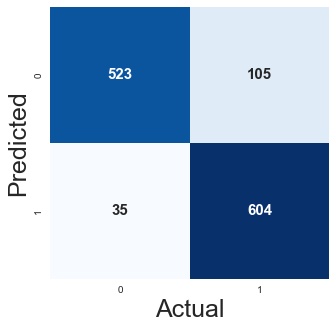

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

fig, ax = plt.subplots(figsize=(5,5))
ax=sns.heatmap(data=confusion_matrix, annot=True,fmt='d', annot_kws={'size': 15,"weight":"bold"},cbar=False, cmap='Blues')
ax.set_ylabel("Predicted", fontsize = 25)
ax.set_xlabel("Actual", fontsize = 25);

In [85]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        FAKE       0.94      0.83      0.88       628
        REAL       0.85      0.95      0.90       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



### CONCLUSION - We can classify FAKE news by the content of the news with an accuracy of 93% by using Support Vector Machine algo SVC